## TOC:
* [Introduct Assignment](#1.1)
* [Second Bullet Header](#1.2)

In [931]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [932]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [933]:
pip install vecstack

Note: you may need to restart the kernel to use updated packages.


In [934]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [935]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [936]:
pip install mlens

Note: you may need to restart the kernel to use updated packages.


## 2.1 Import necessary library

In [937]:
"""Import basic modules."""
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns            
from scipy import stats          # For statistics
 
"""Plotly visualization."""
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

"""Machine learning models."""
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn import tree

"""Classification (evaluation) metrices."""
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score\



"""Ensembling"""
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import BaggingClassifier
from mlens.ensemble import BlendEnsemble
from vecstack import stacking

In [938]:
"""Classification (evaluation) metrices."""
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

In [939]:
from IPython.display import Markdown
def bold(string):
    return display(Markdown(f"**{string}**"))

<a id="1.1"></a> 
## <h1 style="color:red;font-size:40px;font-family:Georgia;text-align:center;"><strong>Table of Content</strong></h1>

***

## <h1 style="color:red;font-size:40px;font-family:Georgia;text-align:center;"><strong>1. Hypothisis </strong></h1>
***

- High Weight likely get more positive stepsis
- High Age likely get positive stepsis


<h1 style="color:red;font-size:40px;font-family:Georgia;text-align:center;"><strong> 2. Data Preparation & Data exploration (EDA) </strong></h1>

***

Before we dive into finding relations between independent variables and our dependent variable(Sepsis), let us create some assumptions about how the relations may turn-out among features.

**Assumptions:**
- PRG: High will get sepsis
- M11  : Obese will likely get sepsis
- AGE : old is likely get sepsis than young


## 2.1 Data Preparation

In [940]:
train = pd.read_csv("Paitients_Files_Train.csv").drop("ID", axis=1)
train.columns = train.columns.str.replace(' ', '') #strip the extra-whitespaces out

In [941]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    int64  
 1   PL         599 non-null    int64  
 2   PR         599 non-null    int64  
 3   SK         599 non-null    int64  
 4   TS         599 non-null    int64  
 5   M11        599 non-null    float64
 6   BD2        599 non-null    float64
 7   Age        599 non-null    int64  
 8   Insurance  599 non-null    int64  
 9   Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 46.9+ KB


In [942]:
validation = pd.read_csv("Paitients_Files_Train.csv")

### Import Test dataset

In [943]:
test = pd.read_csv("Paitients_Files_Test.csv")
test.columns = test.columns.str.replace(' ', '') #strip the extra-whitespaces ou

In [944]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


### ❓<span style="color:blue"> OBSERVATION: </span>
The TRAIN Dataframe contain 598 records and 10 columns. There are 598 training examples in the dataset, this is a good sign since there seems to be large enough data for machine learning. The shape of the dataset tells is that I have 10 attributes. Of the 10 attributes, one is the target variable that the model should predict. This means that I have 9 attributes that have the potential to be used to train my future predictive model.

## Task 2.2: Check data types & Make the data homogeneous

In [945]:
# convert columns to the best possible dtypes, object->string
train = train.convert_dtypes()
test = test.convert_dtypes()
validation = validation.convert_dtypes()

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    Int64  
 1   PL         599 non-null    Int64  
 2   PR         599 non-null    Int64  
 3   SK         599 non-null    Int64  
 4   TS         599 non-null    Int64  
 5   M11        599 non-null    Float64
 6   BD2        599 non-null    Float64
 7   Age        599 non-null    Int64  
 8   Insurance  599 non-null    Int64  
 9   Sepssis    599 non-null    string 
dtypes: Float64(2), Int64(7), string(1)
memory usage: 52.2 KB


### ❓<span style="color:blue"> OBSERVATION: </span>
The method .info() is great for checking out the data types of the different features already coverted into the desired types and non-null values. However, it is not great for getting a visual picture of what is missing for the different features. You will use missingno for this

# 2.3 Missing Values

In [946]:
"""#1.Create a function to calculate missing values"""
def calculateMissingValues(variable):
    """Calculates missing values of a variable."""
    
    return train.isna().sum()[train.isna().sum()>0] # Returns only columns with missing values



""""#2.Create a function to plot scatter plot.
This can also be used to plot missing values"""
def plotScatterPlot(x, y, title, yaxis):
    trace = go.Scatter(
    x = x,
    y = y,
    mode = "markers",
    marker = dict(color = y, size = 35, showscale = True, colorscale = "Rainbow"))
    layout = go.Layout(hovermode= "closest",
                       title = title,
                       yaxis = dict(title = yaxis),
                       height=600,
                       width=900,
                       showlegend=False,
                        paper_bgcolor="rgb(243, 243, 243)",
                        plot_bgcolor="rgb(243, 243, 243)"
                      )
    fig = go.Figure(data = [trace], layout = layout)
    return fig.show()      

In [947]:
"""Plot variables with their corresponding missing values."""
plotScatterPlot(calculateMissingValues(train).index,
               calculateMissingValues(train),
               "Features with Missing Values",
               "Missing Values")

### ❓<span style="color:blue"> OBSERVATION: </span>
There is no missing values in data

# 2.5 Typos

## Transform to UPERCASE

In [948]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
train = train.applymap(lambda s: s.upper() if type(s) == str else s)
train.head(3)

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,POSITIVE
1,1,85,66,29,0,26.6,0.351,31,0,NEGATIVE
2,8,183,64,0,0,23.3,0.672,32,1,POSITIVE


In [949]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
test = test.applymap(lambda s: s.upper() if type(s) == str else s)
test.head(3)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1


## Rename Column Sepssis to Sepsis

In [950]:
#rename
train.rename(columns={"Sepssis": "Sepsis"}, inplace=True)
test.rename(columns={"Sepssis": "Sepsis"}, inplace=True)

## Change Sepsis to 0 (negative) and 1 (positive)

In [951]:
import numpy
train.loc[train['Sepsis'].isin(['POSITIVE']), 'Sepsis'] = '1'
train.loc[train['Sepsis'].isin(['NEGATIVE']), 'Sepsis'] = '0'
train['Sepsis'] = train['Sepsis'].astype('int')

In [952]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    int64  
 1   PL         599 non-null    int64  
 2   PR         599 non-null    int64  
 3   SK         599 non-null    int64  
 4   TS         599 non-null    int64  
 5   M11        599 non-null    float64
 6   BD2        599 non-null    float64
 7   Age        599 non-null    int64  
 8   Insurance  599 non-null    int64  
 9   Sepsis     599 non-null    int32  
dtypes: float64(2), int32(1), int64(7)
memory usage: 44.6 KB


## M11

In [953]:
train_M11_q_low = train["M11"].quantile(0.01)
train_M11_q_hi  = train["M11"].quantile(0.99)

df_filtered = train[(train["M11"] > train_M11_q_hi) | (train["M11"] < train_M11_q_low) | (train["M11"] == 0)]
print(len(df_filtered)/ len(train) * 100)
df_filtered

2.337228714524207


,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
9,8,125,96,0,0,0.0,0.232,54,1,1
49,7,105,0,0,0,0.0,0.305,24,0,0
60,2,84,0,0,0,0.0,0.304,21,0,0
81,2,74,0,0,0,0.0,0.102,22,1,0
120,0,162,76,56,100,53.2,0.759,25,1,1
125,1,88,30,42,99,55.0,0.496,26,1,1
145,0,102,75,23,0,0.0,0.572,21,1,0
177,0,129,110,46,130,67.1,0.319,26,1,1
303,5,115,98,0,0,52.9,0.209,28,1,1
371,0,118,64,23,89,0.0,1.731,21,1,0


## Sample test Dataset

In [954]:
test_M11_q_low = test["M11"].quantile(0.01)
test_M11_q_hi  = test["M11"].quantile(0.99)

df_filtered = test[(test["M11"] > test_M11_q_hi) | (test["M11"] < test_M11_q_low) | (test["M11"] == 0)]
print(len(df_filtered)/ len(test) * 100)
df_filtered

2.366863905325444


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
74,ICU200683,3,123,100,35,240,57.3,0.880,22,0
82,ICU200691,0,162,76,36,0,49.6,0.364,26,1
85,ICU200694,5,136,82,0,0,0.0,0.640,69,1
107,ICU200716,10,115,0,0,0,0.0,0.261,30,1


# 2.6 Sanity checks

Code for checking duplication , outliers and imposible value of the dataset

## 2.6.1 Check duplication


In [955]:
# TRAIN
print("Number of rows before drop of duplicates  in TRAIN:", len(train.index))
print("Number of duplicated records in TRAIN: ", train.duplicated().sum())
train.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates in TRAIN:", len(train.index), "\n\n")


# VALIDATION
print("Number of rows before drop of duplicates in VALIDATION:", len(test.index))
print("Number of duplicated records in VALIDATION: ", test.duplicated().sum())
validation.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates in VALIDATION:", len(test.index))

Number of rows before drop of duplicates  in TRAIN: 599
Number of duplicated records in TRAIN:  0
Number of rows after drop of duplicates in TRAIN: 599 


Number of rows before drop of duplicates in VALIDATION: 169
Number of duplicated records in VALIDATION:  0
Number of rows after drop of duplicates in VALIDATION: 169


## 2.6.2 Impossible values

In [956]:
train.describe().round(2)

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
count,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00
mean,3.82,120.15,68.73,20.56,79.46,31.92,0.48,33.29,0.69,0.35
std,3.36,32.68,19.34,16.02,116.58,8.01,0.34,11.83,0.46,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00,0.00
25%,1.00,99.00,64.00,0.00,0.00,27.10,0.25,24.00,0.00,0.00
50%,3.00,116.00,70.00,23.00,36.00,32.00,0.38,29.00,1.00,0.00
75%,6.00,140.00,80.00,32.00,123.50,36.55,0.65,40.00,1.00,1.00
max,17.00,198.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00,1.00


In [957]:
# Drop rows that have M11 equal and below 0

train = train[train["M11"] != 0]

test = test[test["M11"] != 0]


print("TRAIN DATASET: ")
print(train[["M11"]].describe().round(2))

print("TEST DATASET: ")
print(test[["M11"]].describe().round(2))

TRAIN DATASET: 
          M11
count  590.00
mean    32.41
std      7.02
min     18.20
25%     27.32
50%     32.00
75%     36.60
max     67.10
TEST DATASET: 
          M11
count  167.00
mean    32.64
std      6.59
min     19.50
25%     27.75
50%     32.40
75%     36.70
max     57.30


### ❓<span style="color:blue"> OBSERVATION: </span>
M11( Weight) is impossible with value 0 so I decided drop 0 or below that

# 2.7 Extra exploration and visualization

### 3.1 Histogram of each column

<Figure size 720x540 with 0 Axes>

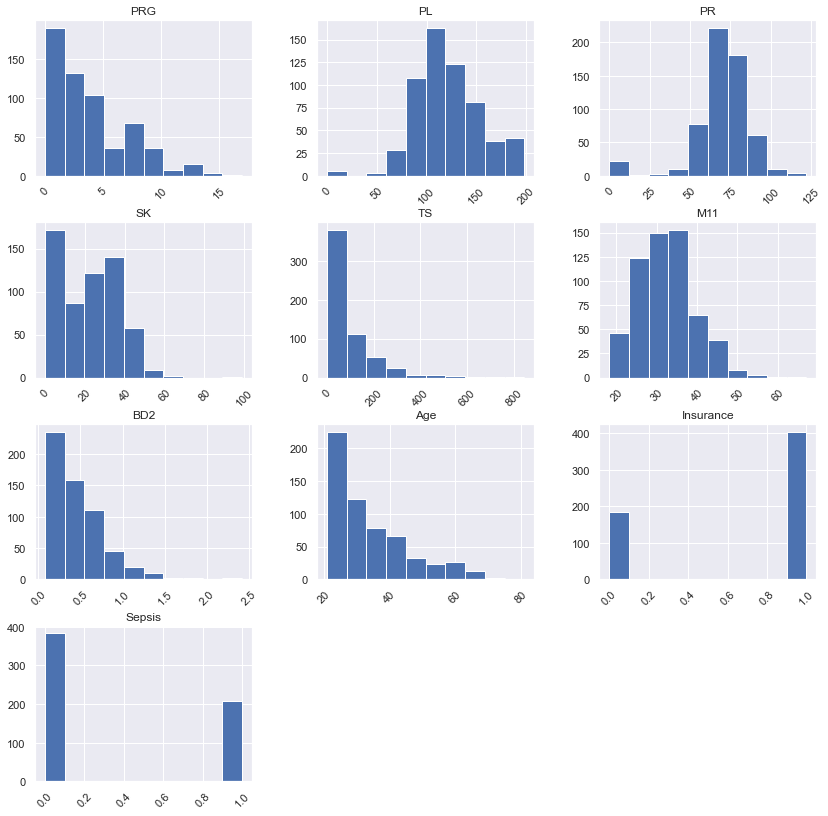

In [958]:
plt.figure()
train.hist(figsize=(14,14), xrot=45)
plt.show()

### ❓<span style="color:blue"> OBSERVATION: </span>
PRG ,SK ,TS ,BD2 have the same distribute
PL , PR ,M11 have the same distribution

### 3.2 Statistic of dataset

In [959]:
train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,3.835593,120.467797,69.383051,20.798305,80.522034,32.406949,0.481976,33.398305,0.686441,0.350847
std,3.367439,32.765279,18.156714,15.980729,117.092357,7.021781,0.334917,11.821781,0.464333,0.477640
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.325000,0.249000,24.000000,0.000000,0.000000
50%,3.000000,116.500000,70.000000,23.000000,39.000000,32.000000,0.388500,29.000000,1.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,125.750000,36.600000,0.650750,40.000000,1.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.000000


### ❓<span style="color:blue">  OBSERVATION: </span>
<li>This train data set has 601 raw and 9 columns.</li>
<li>only 34% patient got positive.</li>


### <span style="color:red"> Outliers detection</span>

In [960]:
def whitespace_remover(df):
    """
    The function will remove extra leading and trailing whitespace from the data.
    """
    # iterating over the columns
    for i in df.columns:
        # checking datatype of each columns
        if df[i].dtype == 'object' or df[i].dtype == 'str':
            # applying strip function on column
            df[i] = df[i].map(str.strip)
        else:
            # if condition is False then it will do nothing.
            pass

# remove all the extra whitespace
whitespace_remover(train)
whitespace_remover(test)

In [961]:
"""#1.Create a function that removes outliers"""
def removeOutliers(variable):
    """Calculates and removes outliers using IQR method."""
    
    # Calculate 1st, 3rd quartiles and iqr.
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower fence and upper fence for outliers
    lowerFence, upperFence = q1-1.5*iqr, q3+1.5*iqr   # Any values less than l_fence and greater than u_fence are outliers.
    
    # Observations that are outliers
    outliers = variable[(variable<lowerFence) | (variable>upperFence)]
    
    # Drop obsevations that are outliers
    filtered = variable.drop(outliers.index, axis = 0).reset_index(drop=True)
    return filtered


"""#2.Create another function to plot boxplot with and without outliers."""
def plotBoxPlot(variable,filteredVariable):
    """Plots Box plot of a variable with and without outliers.
    We will also use the output of removeOutliers function as the input to this function.
    variable = variable with outliers,
    filteredVariable = variable without outliers"""
    
    # Create subplot object.
    fig = make_subplots(
        rows=2,
        cols=1,
        print_grid=False,
    subplot_titles=(f"{variable.name} Distribution with Outliers", f"{variable.name} Distribution without Outliers"))
    
    # This trace plots boxplot with outliers
    fig.add_trace(
        go.Box(
            x = variable,
            name = "", # This removes trace 0
            marker = dict(color="darkred")
        ),
    row=1,col=1)
    
    # This trace plots boxplot without outliers
    fig.add_trace(
        go.Box(
            x = filteredVariable,
            name = "",
            marker = dict(color="green")
        ),
    row=2,col=1)
    
    # Update layout
    fig.layout.update(
        height=800, 
        width=870,
        showlegend=False,
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )
    
    # Update axes
    fig.layout.xaxis2.update(title=f"<b>{variable.name}</b>")
    return fig.show()

In [962]:
"""Plot Age with and without outliers."""
plotBoxPlot(train.Age,removeOutliers(train.Age))

# Age remove outlines

In [963]:
"""Plot Weight with and without outliers."""
plotBoxPlot(train.M11,removeOutliers(train.M11))


## Bivariate Analysis

In [964]:
"""Let's split the train and test data for bivariate analysis since test data has no Survived values. We need our target variable without missing values to conduct the association test with predictor variables."""
df_train = train.iloc[:599, :]
df_test = train.iloc[599:, :]

"""#1.Create a function that creates boxplot between categorical and numerical variables and calculates biserial correlation."""
def boxplotAndCorrelation(numVariable,catVariable=df_train.Sepsis):
    """Return boxplot between a categorical and numerical variable. Also calculates biserial correlation.
    numVariable = a numerical variable of interest."""
    # Calculate point biserial correlation and p value
    biserialCorr = stats.pointbiserialr(numVariable,catVariable)[0].round(2)
    pValue = stats.pointbiserialr(numVariable,catVariable)[1].round(5)
    
    # Create subplot object.
    fig = make_subplots(
        rows=1,
        cols=1,
        print_grid=False,
    )
    
    # This trace plots boxplot of categorical variable vs numerical variable
    fig.add_trace(
        go.Box(
            x = catVariable,
            y = numVariable,
            marker_color="lightseagreen",
            ))
    
    
    # Update layout
    fig.layout.update(
        height=500, 
        width=900,
        showlegend=False,
        title_text= f"Association between {catVariable.name} and {numVariable.name} (corr: {biserialCorr}, p: {pValue})",
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )
    
    # Update axes
    fig.layout.xaxis1.update(title=f"<b>{catVariable.name}</b>")
    fig.layout.yaxis1.update(title=f"<b>{numVariable.name}</b>")
    return fig.show()


"""#2.Create another function to calculate mean when grouped by categorical variable. And also plot the grouped mean."""
def numGroupedByCat(numVariable,catVariable=df_train.Sepsis):
    """Returns a barplot showing mean of numerical variable across the class of categorical variable."""
    
    # Calculates mean across different classes of categorical variable
    numGroupedByCat = numVariable.groupby(catVariable).mean().round(2)
    
    # Create subplot object.
    fig = make_subplots(
        rows=1,
        cols=1,
        print_grid=False,
    )
    
    # This trace plots barplot
    fig.add_trace(
        go.Bar(
            x = numGroupedByCat.index,
            y = numGroupedByCat,
            text=numGroupedByCat,
            hoverinfo="x+y",
            textposition="auto",
            textfont=dict(family="sans serif",size=15)
        ))
    
    # Update layout
    fig.layout.update(
        height=500, 
        width=900,
        showlegend=False,
        title_text= f"Mean {numVariable.name} across {catVariable.name}",
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )
    
    # Update axes
    fig.layout.xaxis1.update(title=f"<b>{catVariable.name}</b>")
    fig.layout.yaxis1.update(title=f"<b>Mean {numVariable.name}</b>")
    return fig.show()

    
"""#3.This function plots histogram of numerical variable for every class of categorical variable."""
def numHistByCat(numVariable,catVariable=df_train.Sepsis):
    """Returns numerical variable distribution across classes of categorical variable."""
    fig,ax = plt.subplots(1,1,figsize = (18,7))
    font_size = 15
    title_size = 18
    numVariable[catVariable==1].hist(bins=50,color="green", label = "survived", grid = False, alpha=0.5)
    numVariable[catVariable==0].hist(bins=50,color="red", label = "died", grid = False, alpha=0.5)
    ax.set_yticks([])
    ax.tick_params(axis="x", labelsize=font_size)
    ax.set_xlabel(f"{numVariable.name}", fontsize = font_size)
    ax.set_title(f"{numVariable.name} Distribution of Survivors vs Victims", fontsize = title_size)
    plt.legend()
    return plt.show()

   
"""#4.Create a function to calculate anova between numerical and categorical variable."""
def calculateAnova(numVariable, catVariable=df_train.Sepsis):
    """Returns f statistics and p value after anova calculation."""
    
    groupNumVariableByCatVariable1 = numVariable[catVariable==1] # Group our numerical variable by categorical variable(1). Group Fair by survivors
    groupNumVariableByCatVariable0 = numVariable[catVariable==0] # Group our numerical variable by categorical variable(0). Group Fare by victims
    # Calculate one way anova
    fValue, pValue = stats.f_oneway(groupNumVariableByCatVariable1, groupNumVariableByCatVariable0) # Calculate f statistics and p value
    return f"Anova Result between {numVariable.name} & {catVariable.name}: f=> {fValue}, p=> {pValue}"

In [965]:
"""Create a boxplot to visualize the strength of association of Sepsis with Age. Also calculate biserial correlation."""
boxplotAndCorrelation(df_train.Age)

In [966]:
"""So the mean fare of survivors should be much more (from positive correlation or boxplot interpretation) than those who died. Calculate mean fare paid by the survivors as well as by the victims."""
numGroupedByCat(df_train.Age)

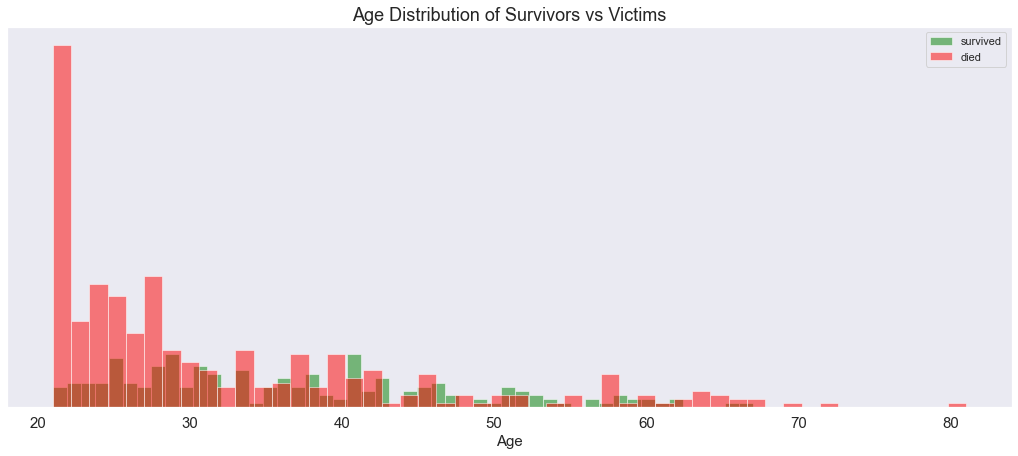

In [967]:
"""Plot histogram of survivor's vs victims fare."""
numHistByCat(df_train.Age)

In [968]:
"""Let's perform ANOVA between Fare and Survived. One can omit this step. I perform just to show how anova is performed if there were more than two groups in our categorical variable."""
calculateAnova(df_train.Age)

'Anova Result between Age & Sepsis: f=> 24.529653186456326, p=> 9.576489526868944e-07'

In [969]:
"""Create a boxplot to visualize the strength of association of Survived with Fare. Also calculate biserial correlation."""
boxplotAndCorrelation(df_train.M11)

In [970]:
"""So the mean fare of survivors should be much more (from positive correlation or boxplot interpretation) than those who died. Calculate mean fare paid by the survivors as well as by the victims."""
numGroupedByCat(df_train.M11)

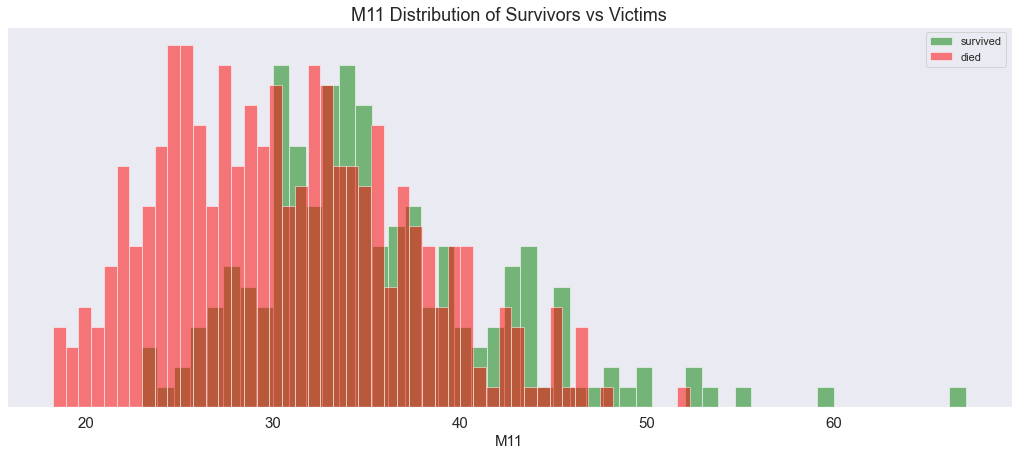

In [971]:
"""Plot histogram of survivor's vs victims fare."""
numHistByCat(df_train.M11)

In [972]:
"""Let's perform ANOVA between Fare and Survived. One can omit this step. I perform just to show how anova is performed if there were more than two groups in our categorical variable."""
calculateAnova(df_train.M11)

'Anova Result between M11 & Sepsis: f=> 71.87515771011587, p=> 1.8529012994711474e-16'

## Percent of people having sepsis

<Figure size 1440x576 with 0 Axes>

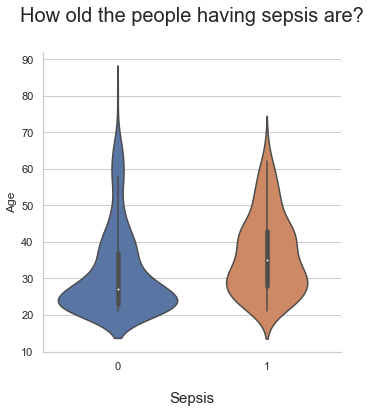

In [973]:
fig = plt.figure(figsize=(20,8))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='Age',
            kind="violin", data=train)
plt.title('How old the people having sepsis are?', fontsize = 20, pad = 30)
plt.ylabel("Age")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);



## ❓<span style="color:blue">  OBSERVATION: </span>
Observe from the plot , patients get sepsis mostly more than 30
***

## ❓<span style="color:blue"> OBSERVATION: </span>
Begin from 31 the positive tends to dominance negative which means people > 30 get sepsis more than young people
***

## Weight vs Sepsis

<Figure size 2880x2160 with 0 Axes>

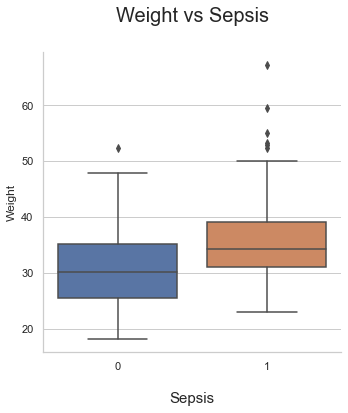

In [974]:
fig = plt.figure(figsize=(40,30))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='M11',
            kind="box", data=train)
plt.title('Weight vs Sepsis', fontsize = 20, pad = 30)
plt.ylabel("Weight")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);

## ❓<span style="color:blue"> OBSERVATION: </span>
People are obese likely get sepsis
***

<Figure size 2880x2160 with 0 Axes>

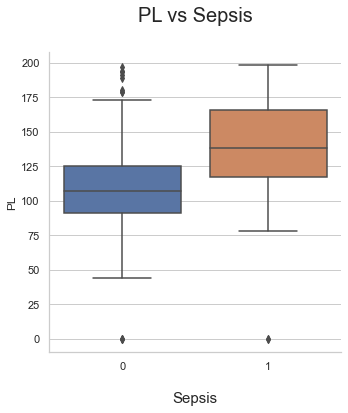

In [975]:
fig = plt.figure(figsize=(40,30));
sns.set(style="whitegrid");
sns.catplot(x='Sepsis', y='PL',
            kind="box", data=train);
plt.title('PL vs Sepsis', fontsize = 20, pad = 30);
plt.ylabel("PL");
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);

<Figure size 2880x2160 with 0 Axes>

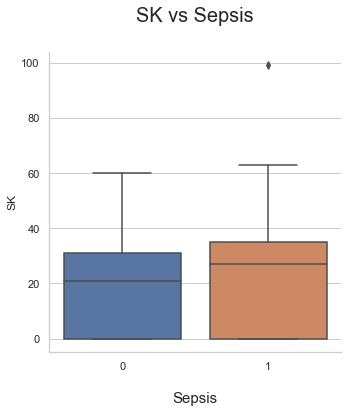

In [976]:
fig = plt.figure(figsize=(40,30))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='SK',
            kind="box", data=train)
plt.title('SK vs Sepsis', fontsize = 20, pad = 30)
plt.ylabel("SK")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);

<Figure size 2880x2160 with 0 Axes>

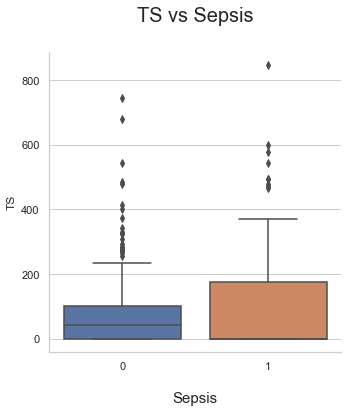

In [977]:
fig = plt.figure(figsize=(40,30))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='TS',
            kind="box", data=train)
plt.title('TS vs Sepsis', fontsize = 20, pad = 30)
plt.ylabel("TS")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);

<Figure size 2880x2160 with 0 Axes>

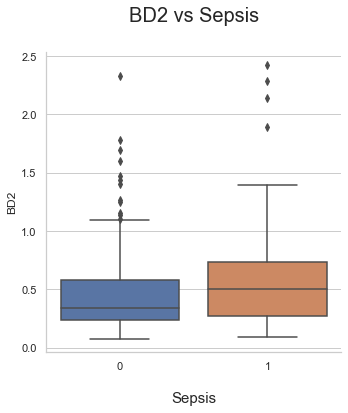

In [978]:
fig = plt.figure(figsize=(40,30))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='BD2',
            kind="box", data=train)
plt.title('BD2 vs Sepsis', fontsize = 20, pad = 30)
plt.ylabel("BD2")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);

In [979]:
def age_impute(train, test):
    for i in [train, test]:
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
        data = train.groupby(['Name_Title', 'Pclass'])['Age']
        i['Age'] = data.transform(lambda x: x.fillna(x.mean()))
    return train, test

<AxesSubplot:>

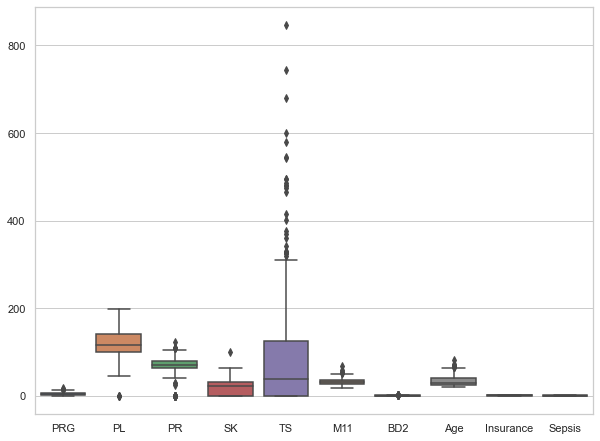

In [980]:
plt.rcParams['figure.figsize'] = [10,7.5]
sns.boxplot(data=train, orient="v")


# <h1 style="color:red;font-size:40px;font-family:Georgia;text-align:center;"><strong>  3. Feature Engineering </strong></h1>
***

### Missing Values

In [981]:
print("Total missing values in TRAIN:", train.isna().sum().sum())
print("Total missing values in TEST:", test.isna().sum().sum())

Total missing values in TRAIN: 0
Total missing values in TEST: 0


### ❓<span style="color:blue"> OBSERVATION: </span>
No missing values in dataset

C:\Users\William\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\William\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\William\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.



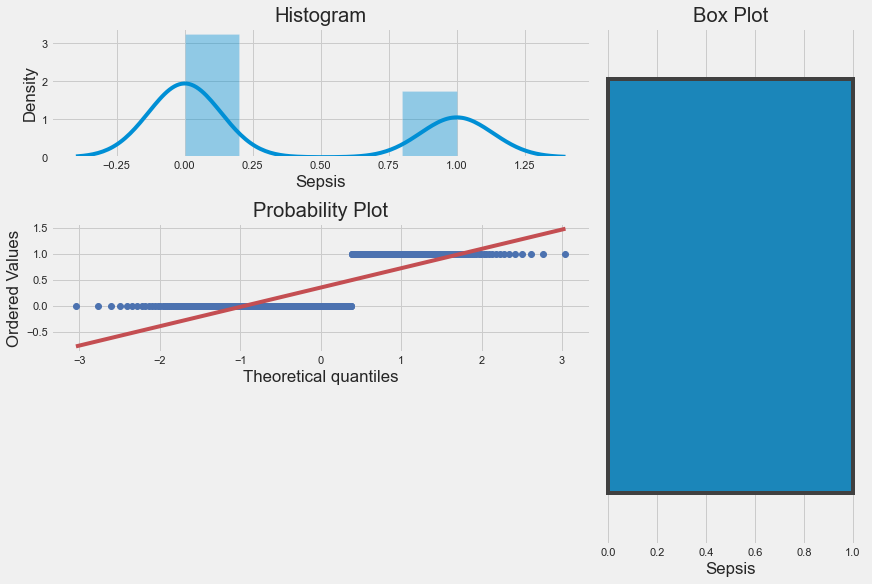

In [996]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(train, 'Sepsis')

### ❓<span style="color:blue"> OBSERVATION: </span>
> There are lots of outliners

> Sepsis is normal distribution

In [997]:
#skewness and kurtosis
print("Skewness: " + str(train['Sepsis'].skew()))
print("Kurtosis: " + str(train['Sepsis'].kurt()))

Skewness: 0.6266635508993044
Kurtosis: -1.6127713575156994


### ❓<span style="color:blue"> OBSERVATION: </span>

Positive Skewess
> There are more positive cases than average but at low 

Negative Kurtosis
>This simply means that more sepsis data values are located near the mean and less data values are located on the tails.

In [999]:
from scipy.stats import skew  # for some statistics
numeric_feats = train.dtypes[train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
BD2,1.973986
TS,1.912268
Age,1.142997
PRG,0.915079
Sepsis,0.625069
M11,0.619253
PL,0.528534
PR,0.154320
SK,-0.025626
Insurance,-0.803728


<a id="3.2"></a>
### 3.2 [Box Cox Transformation of (highly) skewed features](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.special.boxcox1p.html)
+ We use the scipy function boxcow which computes the Box-Cox transformation of  1+x .

+ Note that setting  λ=0  is equivalent to log1p used above for the target variable.

+ See this page for more details on Box Cox Transformation as well as the scipy function's page

In [1001]:
## Getting the correlation of all the features with target variable. 
(train.corr()**2)["Sepsis"].sort_values(ascending = False)[1:]

PL           0.232766
M11          0.108922
PRG          0.041088
Age          0.040046
BD2          0.034689
PR           0.025846
TS           0.023640
Insurance    0.003664
SK           0.003278
Name: Sepsis, dtype: float64

### ❓<span style="color:blue"> OBSERVATION: </span>
PL is the most correlation

<a id="3.3"></a>
### 3.3 Assumptions of Regression

* **Linearity ( Correct functional form )** 
* **Homoscedasticity ( Constant Error Variance )( vs Heteroscedasticity )**
* **Independence of Errors ( vs Autocorrelation )**
* **Multivariate Normality ( Normality of Errors )**
* **No or little Multicollinearity** 

> So, **How do I check regression assumptions? I fit a regression line and look for the variability of the response data along the regression line.** Let's apply this to each one of them.

> **Linearity(Correct functional form):** 
Linear regression needs the relationship between each independent variable and the dependent variable to be linear. The linearity assumption can be tested with scatter plots. The following two examples depict two cases, where no or little linearity is present. 

### Removing multicollinary columns

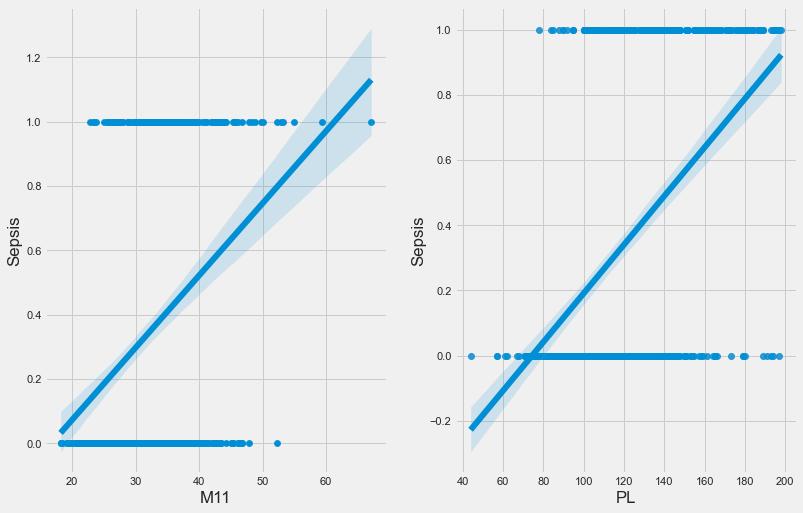

In [1004]:
## Plot sizing. 
fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
## Scatter plotting for Severity and Distance(mi).
sns.scatterplot( x = train['M11'], y = train.Sepsis,  ax=ax1)
## Putting a regression line. 
sns.regplot(x=train['M11'], y=train.Sepsis, ax=ax1)

## Scatter plotting for Severity and ['Wind_Speed(mph)'].
sns.scatterplot(x = train['PL'],y = train.Sepsis, ax=ax2, color='pink')
## regression line for MasVnrArea and Severity.
sns.regplot(x=train['PL'], y=train.Sepsis, ax=ax2);

C:\Users\William\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\William\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\William\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.



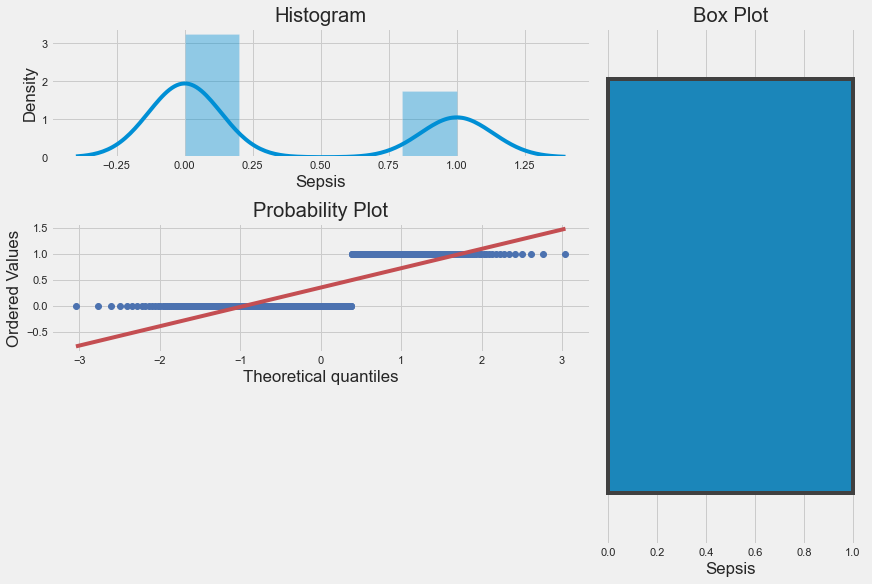

In [1005]:
plotting_3_chart(train, 'Sepsis')

### ❓<span style="color:blue"> OBSERVATION: </span>
No feature have missing values.

C:\Users\William\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).




 mu = 0.35 and sigma = 0.48



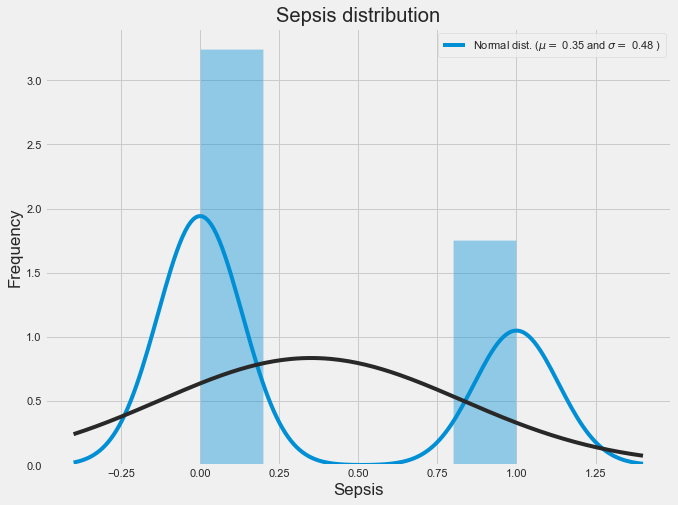

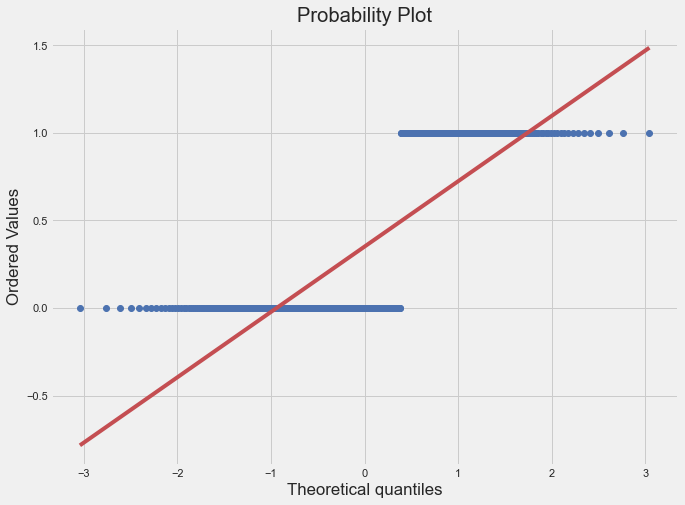

In [1007]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(train['Sepsis'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Sepsis'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Sepsis distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Sepsis'], plot=plt)
plt.show()

As you can see, the log transformation removes the normality of errors, which solves most of the other errors we talked about above. Let's make a comparison of the pre-transformed and post-transformed state of residual plots. 

> Here, we see that the pre-transformed chart on the left has heteroscedasticity, and the post-transformed chart on the right has Homoscedasticity(almost an equal amount of variance across the zero lines). It looks like a blob of data points and doesn't seem to give away any relationships. That's the sort of relationship we would like to see to avoid some of these assumptions. 

### Data Correlation

As we examined these scatter plots, I thought it was time to explain the Multiple Linear Regression assumptions. Before constructing a multiple linear regression model, we must ensure that the following assumptions are correct.

Already, we can observe some potentially intriguing correlations between the objective variable (the number of fatal accidents) and the feature variables (the remaining three columns).

The Pearson correlation coefficient matrix may be used to quantify the pairwise associations shown in the scatter plots. The Pearson correlation coefficient is one of the most often used methods for quantifying correlation between variables, and the following criteria are frequently employed by convention:

0.2 = weak
0.5 = medium
0.8 = strong
0.9 = very strong

## M11 filter Groupby

In [982]:
# Filter m11 using groupby
train.loc[(train["M11"] == 0), 'M11'] = np.nan
train['M11'] = train.groupby('Age')['M11'].apply(lambda x: x.fillna(x.median()))

## SK

In [983]:
# Filter SK using groupby
train.loc[(train["SK"] >90), 'SK'] = np.nan
train['SK'] = train.groupby('Age')['SK'].apply(lambda x: x.fillna(x.median()))

### PL

In [984]:
# Filter pl using groupby
train.loc[(train["PL"] == 0), 'PL'] = np.nan
train['PL'] = train.groupby('Age')['PL'].apply(lambda x: x.fillna(x.median()))

##  TS

In [985]:
# Filter SK using groupby
train.loc[(train["TS"] >650), 'TS'] = np.nan
train['TS'] = train.groupby('Age')['TS'].apply(lambda x: x.fillna(x.median()))

## Remove PR with 0 value

In [986]:
test.loc[(test["PR"] == 0), 'PR'] = test["PR"].mean()
train.loc[(train["PR"] == 0), 'PR'] = train["PR"].mean()

## Remove M11 with 0 value

In [987]:
test.loc[(test["M11"] == 0), 'PR'] = test["M11"].mean()
train.loc[(train["M11"] == 0), 'PR'] = train["M11"].mean()

In [988]:
# Outlier detection 
from collections import Counter

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train,2,["Age","M11","BD2"])

In [989]:
train.loc[Outliers_to_drop] # Show the outliers rows

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis


# No outliner

## Input missing value

 ##  ❓<span style="color:blue ">OBSERVATION: </span>
- There is no missing value
***

#  3. Check corelation for dropping
***

In [990]:
corelation = train.corr()

C:\Users\William\AppData\Local\Temp/ipykernel_1116/4104708637.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



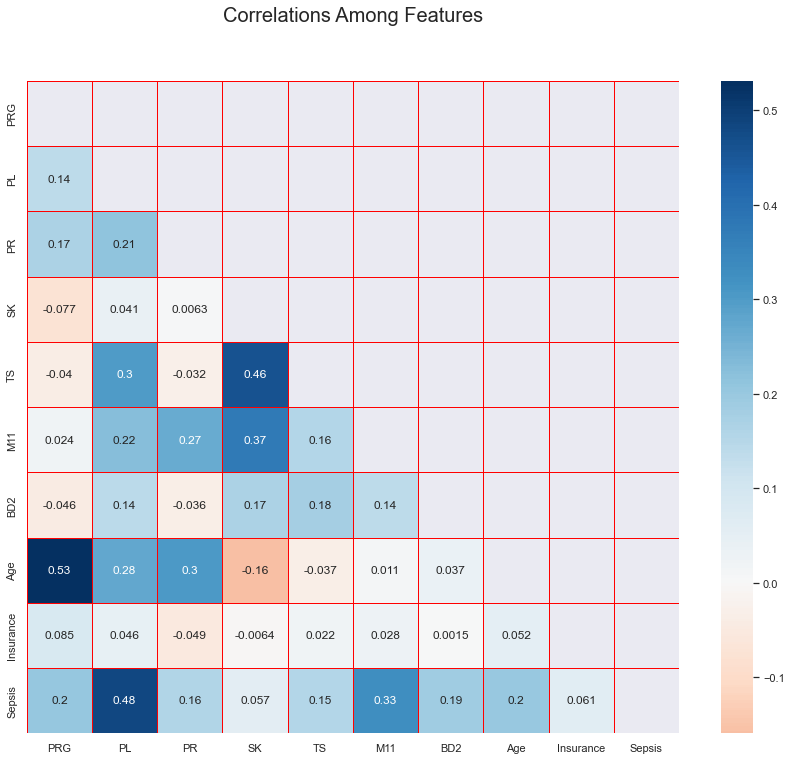

In [991]:
import matplotlib.style as style
import numpy as np
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('darkgrid')
plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='red',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

## ❓ <span style="color:blue "> OBSERVATION : </span>
 All corelation is under 50% so all data is fine
 
#### Positive Correlation Features:
- PL and Sepsis: 

#### Negative Correlation Features:
- No negative features



In [992]:
print (train.info())
print ("*"*40)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 0 to 598
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        590 non-null    int64  
 1   PL         590 non-null    float64
 2   PR         590 non-null    float64
 3   SK         590 non-null    float64
 4   TS         590 non-null    float64
 5   M11        590 non-null    float64
 6   BD2        590 non-null    float64
 7   Age        590 non-null    int64  
 8   Insurance  590 non-null    int64  
 9   Sepsis     590 non-null    int32  
dtypes: float64(6), int32(1), int64(3)
memory usage: 64.6 KB
None
****************************************


<li>We may dont have missing values in our features.</Li>


## Train - Test - Validation

## 2.3 Drop column ID and Insurance

In [993]:
train = train.drop(columns=['ID','Insurance'])
test = test.drop(columns=['ID','Insurance'])

KeyError: "['ID'] not found in axis"

In [ ]:
# train = train.drop(columns=['PRG'])
# test = test.drop(columns=['PRG'])

### Splitting dataset into X and Y

In [ ]:
X = train.drop(['Sepsis'], axis = 1)
y = train["Sepsis"]

## Check data 

In [ ]:
X.head()

In [ ]:
y.head()

## Data transformation

In [ ]:
display(X.dtypes)

In [ ]:
X.head()

In [ ]:
y.head()

 <h1 style="color:red;font-size:40px;font-family:Georgia;text-align:center;"><strong>3. Model Traning </strong></h1>
 

In [ ]:
from sklearn.model_selection import train_test_split
seed = 42
X_train , X_test ,y_train ,y_test = train_test_split(X,y , train_size = 0.7 , test_size = 0.3 , random_state=42)


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
print(X_test)

In [ ]:
from sklearn.preprocessing import RobustScaler
st_scale = StandardScaler()

X_train = st_scale.fit_transform(X_train)
X_test = st_scale.fit_transform(X_test)

test = st_scale.fit_transform(test)

In [ ]:
"""See the dimensions of input and output data set."""
print(f"Input Matrix Dimension: {X_train.shape}")
print(f"Output Vector Dimension: {y_train.shape}")
print(f"Test Data Dimension: {X_test.shape}")

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [ ]:
"""Now initialize all the classifiers object."""
"""#1.Logistic Regression"""
lr = LogisticRegression()

"""#3.Random Forest Classifier"""
rf = RandomForestClassifier(random_state = seed, n_estimators = 100)




# Decision Tree
***

In [ ]:
"""#6.Decision Tree Classifier"""
dt = DecisionTreeClassifier(random_state = seed)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

## Hypertunning 

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
"""For DT, the following hyperparameters are usually tunned."""

In [ ]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=['Positive','Negative']
               ,xticklabels=['Positive','Negative'],cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

In [ ]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

In [ ]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))
plt.figure(figsize=(15,15))
plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [ ]:
clf_ = DecisionTreeClassifier(random_state=42,ccp_alpha=0.03)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

# Gridsearch

In [ ]:
dtparams = {'max_depth': [2,4,6,8,10,20,None],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [5, 10, 20, 50, 100],
           'criterion': ["gini", "entropy"]}
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)
gcv = GridSearchCV(estimator=dt,param_grid=dtparams,cv=cv, n_jobs=-1, verbose=1, scoring = "roc_auc")
gcv.fit(X_train,y_train)

In [ ]:
## Getting the best of everything. 
print (gcv.best_score_)
print (gcv.best_params_)
print(gcv.best_estimator_)

In [ ]:
from sklearn.metrics import f1_score
max_depths = np.linspace(1, 1, 2, endpoint=True) # List of values for tuning
train_results = [] # Store train accuracy results
test_results = []  # Store test accuracy results
for max_depth in max_depths:
   decisionTree =DecisionTreeClassifier(criterion = 'gini',
                                              max_depth = 6,
                                              max_features='auto',
                                              ccp_alpha = 0.02, 
                                              min_samples_leaf=20, 
                                              min_samples_split=2,
                                               random_state=42,
                                                splitter = "best")
   decisionTree.fit(X_train, y_train)
   train_pred = decisionTree.predict(X_train)
   train_acc = f1_score(y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(train_acc)

   #test
   test_pred = decisionTree.predict(X_test)
   test_acc = f1_score(y_test, test_pred)
   # Add auc score to previous test results
   test_results.append(test_acc)

   print('The Training f1 Accuracy for max_depth {} is:'.format(max_depth), train_acc)
   print('The Test f1 Accuracy for max_depth {} is:'.format(max_depth), test_acc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label='Train AUC')
line2, = plt.plot(max_depths, test_results, "r", label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()

In [ ]:
train_acc = f1_score(y_train, train_pred)
test_acc = f1_score(y_test, test_pred)
print("Train F1 score: " + str(train_acc))
print("Test F1 score: " + str(test_acc))

In [ ]:
print(f'Train score {accuracy_score(train_pred,y_train)}')
print(f'Test score {accuracy_score(test_pred,y_test)}')
plot_confusionmatrix(train_pred,y_train,dom='Train')
plot_confusionmatrix(test_pred,y_test,dom='Test')

In [ ]:
print(classification_report(y_train, train_pred))

In [ ]:
print(y_train)

In [ ]:
"""Create a function that returns learning curves for different classifiers."""
def plotLearningCurve(model):
    """Returns a plot of learning curve of a model."""
    
    # Create feature matrix and target vector
    X, y = X_train, y_train
    # Create CV training and test scores for various training set sizes
    trainSizes, trainScores, testScores = learning_curve(model, X, y, cv = 10,
                                                    scoring="roc_auc", n_jobs = -1, 
                                                    train_sizes = np.linspace(0.01, 1.0, 17), # 17 different sizes of the training set
                                                    random_state = seed)
                                                    

    # Create means and standard deviations of training set scores
    trainMean = np.mean(trainScores, axis = 1)
    trainStd = np.std(trainScores, axis = 1)

    # Create means and standard deviations of test set scores
    testMean = np.mean(testScores, axis = 1)
    testStd = np.std(testScores, axis = 1)

    # Draw lines
    plt.plot(trainSizes, trainMean, "o-", color = "red",  label = "training score")
    plt.plot(trainSizes, testMean, "o-", color = "green", label = "cross-validation score")
    
    # Draw bands
    plt.fill_between(trainSizes, trainMean - trainStd, trainMean + trainStd, alpha = 0.1, color = "r") # Alpha controls band transparency.
    plt.fill_between(trainSizes, testMean - testStd, testMean + testStd, alpha = 0.1, color = "g")

    # Create plot
    font_size = 15
    plt.xlabel("Training Set Size", fontsize = font_size)
    plt.ylabel("Accuracy Score", fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.legend(loc = "best")
    plt.grid()

In [ ]:
"""Now plot learning curves of the optimized models in subplots."""
plt.figure(figsize = (25,25))
lcModels = [dt]
lcLabels = ["DT"]

for ax, model, label in zip (range(1,9), lcModels, lcLabels):
    plt.subplot(4,2,ax)
    plotLearningCurve(model)
    plt.title(label, fontsize = 18)
plt.suptitle("Learning Curves of Optimized Models", fontsize = 28)
plt.tight_layout(rect = [0, 0.03, 1, 0.97])

# Logistic Regression
***

In [ ]:
"""#6.Decision Tree Classifier"""
lr = LogisticRegression(random_state = seed)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


## Hypertunning 

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
"""For DT, the following hyperparameters are usually tunned."""



In [ ]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=['Positive','Negative']
               ,xticklabels=['Positive','Negative'],cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

# Gridsearch

In [ ]:
lrparams = {"penalty":["l1", "l2"],
            "C": np.logspace(0, 4, 10),
            "max_iter":[5000]}
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)
gcv = GridSearchCV(estimator=lr,param_grid=lrparams,cv=cv)
gcv.fit(X_train,y_train)

In [ ]:
## Getting the best of everything. 
print (gcv.best_score_)
print (gcv.best_params_)
print(gcv.best_estimator_)

In [ ]:
from sklearn.metrics import f1_score
max_depths = np.linspace(1, 2, 2, endpoint=True) # List of values for tuning
train_results = [] # Store train accuracy results
test_results = []  # Store test accuracy results
for max_depth in max_depths:
   decisionTree = LogisticRegression(C= 7.742636826811269, 
                                          max_iter= 5000, 
                                          penalty= 'l2')
   decisionTree.fit(X_train, y_train)
   train_pred = decisionTree.predict(X_train)
   train_acc = f1_score(y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(train_acc)

   #test
   test_pred = decisionTree.predict(X_test)
   test_acc = f1_score(y_test, test_pred)
   # Add auc score to previous test results
   test_results.append(test_acc)

   print('The Training f1 Accuracy for max_depth {} is:'.format(max_depth), train_acc)
   print('The Test f1 Accuracy for max_depth {} is:'.format(max_depth), test_acc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label='Train AUC')
line2, = plt.plot(max_depths, test_results, "r", label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()

In [ ]:
train_acc = f1_score(y_train, train_pred)
test_acc = f1_score(y_test, test_pred)
print("Train F1 score: " + str(train_acc))
print("Test F1 score: " + str(test_acc))

In [ ]:
print(f'Train score {accuracy_score(train_pred,y_train)}')
print(f'Test score {accuracy_score(test_pred,y_test)}')
plot_confusionmatrix(train_pred,y_train,dom='Train')
plot_confusionmatrix(test_pred,y_test,dom='Test')

In [ ]:
print(classification_report(y_train, train_pred))

In [ ]:
print(y_train)

In [ ]:
"""Create a function that returns learning curves for different classifiers."""
def plotLearningCurve(model):
    """Returns a plot of learning curve of a model."""
    
    # Create feature matrix and target vector
    X, y = X_train, y_train
    # Create CV training and test scores for various training set sizes
    trainSizes, trainScores, testScores = learning_curve(model, X, y, cv = 10,
                                                    scoring="accuracy", n_jobs = -1, 
                                                    train_sizes = np.linspace(0.01, 1.0, 17), # 17 different sizes of the training set
                                                    random_state = seed)
                                                    

    # Create means and standard deviations of training set scores
    trainMean = np.mean(trainScores, axis = 1)
    trainStd = np.std(trainScores, axis = 1)

    # Create means and standard deviations of test set scores
    testMean = np.mean(testScores, axis = 1)
    testStd = np.std(testScores, axis = 1)

    # Draw lines
    plt.plot(trainSizes, trainMean, "o-", color = "red",  label = "training score")
    plt.plot(trainSizes, testMean, "o-", color = "green", label = "cross-validation score")
    
    # Draw bands
    plt.fill_between(trainSizes, trainMean - trainStd, trainMean + trainStd, alpha = 0.1, color = "r") # Alpha controls band transparency.
    plt.fill_between(trainSizes, testMean - testStd, testMean + testStd, alpha = 0.1, color = "g")

    # Create plot
    font_size = 15
    plt.xlabel("Training Set Size", fontsize = font_size)
    plt.ylabel("Accuracy Score", fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.legend(loc = "best")
    plt.grid()

In [ ]:
"""Now plot learning curves of the optimized models in subplots."""
plt.figure(figsize = (25,25))
lcModels = [dt]
lcLabels = ["DT"]

for ax, model, label in zip (range(1,9), lcModels, lcLabels):
    plt.subplot(4,2,ax)
    plotLearningCurve(model)
    plt.title(label, fontsize = 18)
plt.suptitle("Learning Curves of Optimized Models", fontsize = 28)
plt.tight_layout(rect = [0, 0.03, 1, 0.97])

# Raindom Forest
***

In [ ]:
"""#6.Decision Tree Classifier"""
rf = RandomForestClassifier(random_state = seed)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


## Hypertunning 

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
"""For DT, the following hyperparameters are usually tunned."""



In [ ]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=['Positive','Negative']
               ,xticklabels=['Positive','Negative'],cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

# Gridsearch

In [ ]:

import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 80, 
                               cv = 4, verbose= 5, random_state= 101, n_jobs = -1)
model.fit(X_train,y_train)

In [ ]:
## Getting the best of everything. 
print (model.best_score_)
print (model.best_params_)
print(model.best_estimator_)

In [ ]:
from sklearn.metrics import f1_score
max_depths = np.linspace(1, 2, 2, endpoint=True) # List of values for tuning
train_results = [] # Store train accuracy results
test_results = []  # Store test accuracy results
for max_depth in max_depths:
   rf = RandomForestClassifier(n_estimators= 1200,
                                         min_samples_split= 10,
                                         min_samples_leaf= 2,
                                         max_features= 'auto',
                                         max_depth= 10,
                                         criterion= 'gini')

   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   train_acc = f1_score(y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(train_acc)

   #test
   test_pred = rf.predict(X_test)
   test_acc = f1_score(y_test, test_pred)
   # Add auc score to previous test results
   test_results.append(test_acc)

   print('The Training f1 Accuracy for max_depth {} is:'.format(max_depth), train_acc)
   print('The Test f1 Accuracy for max_depth {} is:'.format(max_depth), test_acc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label='Train AUC')
line2, = plt.plot(max_depths, test_results, "r", label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()

In [ ]:
train_acc = f1_score(y_train, train_pred)
test_acc = f1_score(y_test, test_pred)
print("Train F1 score: " + str(train_acc))
print("Test F1 score: " + str(test_acc))

In [ ]:
print(f'Train score {accuracy_score(train_pred,y_train)}')
print(f'Test score {accuracy_score(test_pred,y_test)}')
plot_confusionmatrix(train_pred,y_train,dom='Train')
plot_confusionmatrix(test_pred,y_test,dom='Test')

In [ ]:
print(classification_report(y_train, train_pred))

In [ ]:
print(y_train)

In [ ]:
"""Create a function that returns learning curves for different classifiers."""
def plotLearningCurve(model):
    """Returns a plot of learning curve of a model."""
    
    # Create feature matrix and target vector
    X, y = X_train, y_train
    # Create CV training and test scores for various training set sizes
    trainSizes, trainScores, testScores = learning_curve(model, X, y, cv = 10,
                                                    scoring="accuracy", n_jobs = -1, 
                                                    train_sizes = np.linspace(0.01, 1.0, 17), # 17 different sizes of the training set
                                                    random_state = seed)
                                                    

    # Create means and standard deviations of training set scores
    trainMean = np.mean(trainScores, axis = 1)
    trainStd = np.std(trainScores, axis = 1)

    # Create means and standard deviations of test set scores
    testMean = np.mean(testScores, axis = 1)
    testStd = np.std(testScores, axis = 1)

    # Draw lines
    plt.plot(trainSizes, trainMean, "o-", color = "red",  label = "training score")
    plt.plot(trainSizes, testMean, "o-", color = "green", label = "cross-validation score")
    
    # Draw bands
    plt.fill_between(trainSizes, trainMean - trainStd, trainMean + trainStd, alpha = 0.1, color = "r") # Alpha controls band transparency.
    plt.fill_between(trainSizes, testMean - testStd, testMean + testStd, alpha = 0.1, color = "g")

    # Create plot
    font_size = 15
    plt.xlabel("Training Set Size", fontsize = font_size)
    plt.ylabel("Accuracy Score", fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.legend(loc = "best")
    plt.grid()

In [ ]:
"""Now plot learning curves of the optimized models in subplots."""
plt.figure(figsize = (25,25))
lcModels = [dt]
lcLabels = ["DT"]

for ax, model, label in zip (range(1,9), lcModels, lcLabels):
    plt.subplot(4,2,ax)
    plotLearningCurve(model)
    plt.title(label, fontsize = 18)
plt.suptitle("Learning Curves of Optimized Models", fontsize = 28)
plt.tight_layout(rect = [0, 0.03, 1, 0.97])